In [1]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt

In [22]:
images = [cv2.imread(file,0) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p4/I/*.png")]

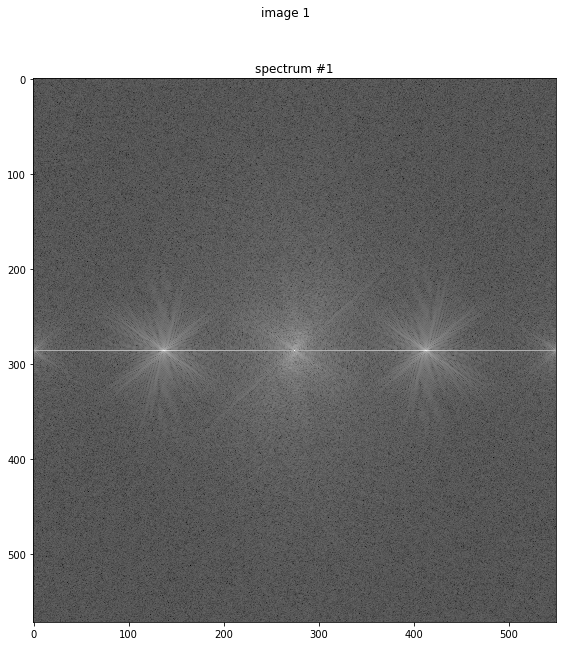

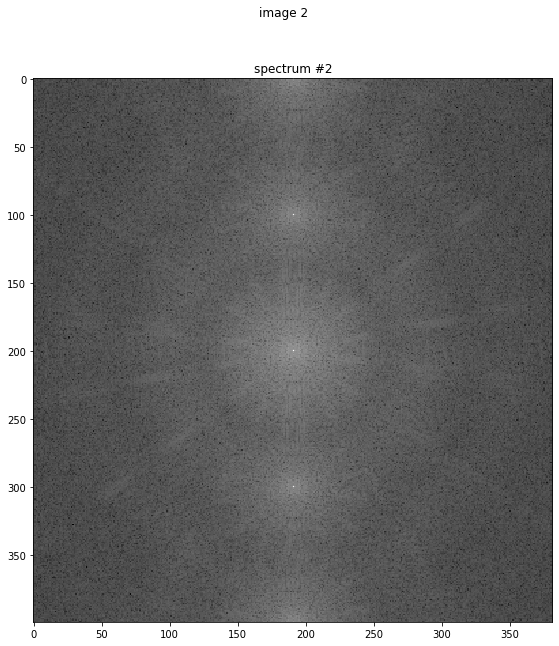

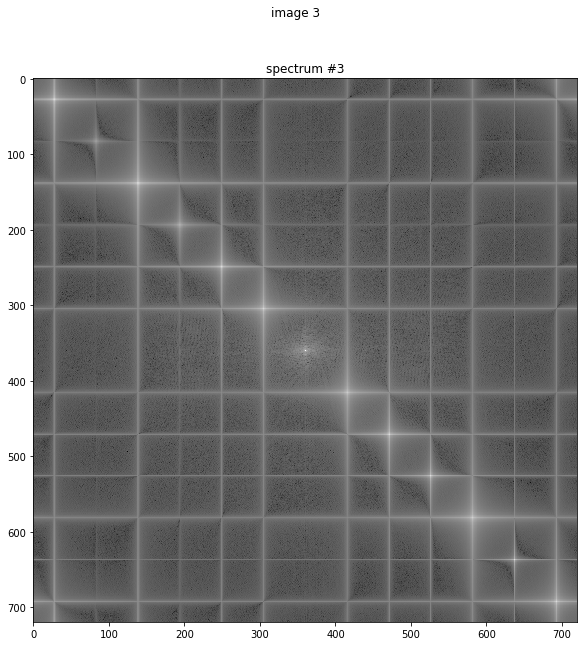

In [3]:
#%matplotlib inline
index = 0
dfts = []
for im in images:
    index+=1
    matplotlib.rcParams['figure.figsize'] = [10,10]
    plt.figure(index)
    dft = np.fft.fft2(im)
    dft2 = np.fft.fftshift(dft)
    dfts.append(dft2)
    angle = np.angle(dft2)
    mag = np.abs(dft2)  
    #plt.subplot(1,3,index)
    plt.imshow(np.log(mag),'gray')
    plt.title('spectrum #{}'.format(index))
    plt.suptitle('image {}'.format(index))
    plt.show()

In [4]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            base[x,y] = 1 - exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [5]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if distance((x,y),(u,v)) <= D0:
                base[x,y] = 0
            else:
                base[x,y] = 1
    return base

In [6]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def ideallHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if (x-200)/(y-191+0.000000001) == 1:
                base[x,y] = 0
            else:
                base[x,y] = 1
    return base

In [7]:
def ver_line(D0, image, v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(y-v) <= D0:
                base[x,y] = 0
            else:
                base[x,y] = 1
    return base

In [8]:
def hor_line(D0, image, u):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 0
            else:
                base[x,y] = 1
    return base

# image 1

In [9]:
bs1 = gaussianHP(100,dfts[0],286,142)
bs2 = gaussianHP(100,dfts[0],286,412)
bs3 = gaussianHP(100,dfts[0],286,1)
bs4 = gaussianHP(100,dfts[0],286,572)

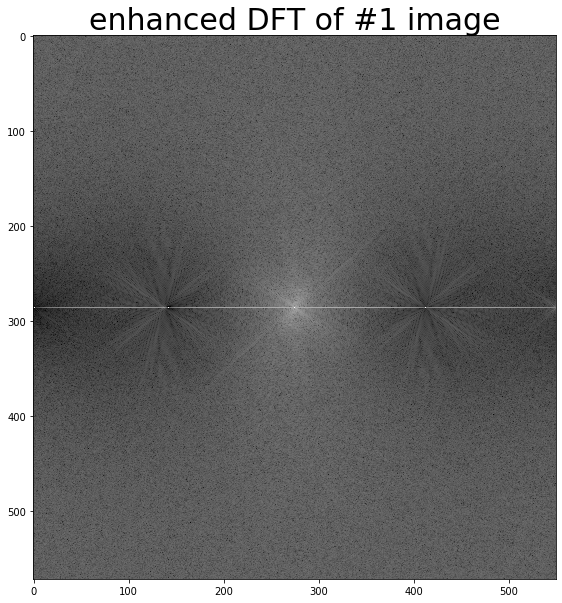

In [10]:
filtered = bs3*bs4*bs2*bs1*dfts[0]
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #1 image',fontsize=30)
plt.show()

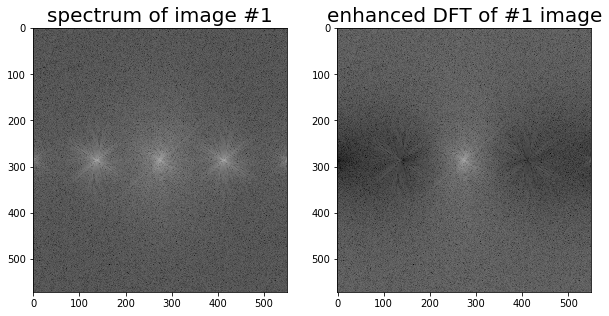

In [11]:
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(dfts[0])),'gray')
plt.title('spectrum of image #1',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #1 image',fontsize=20)
plt.show()

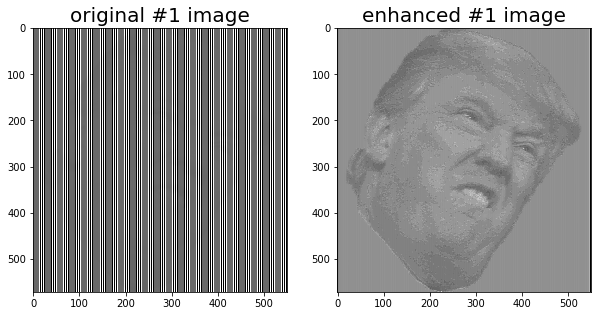

In [12]:
new = np.fft.ifftshift(filtered)
new = np.fft.ifft2(new)
new_contrast = new ** 8

plt.subplot(1,2,1)
plt.imshow(images[0],'gray')
plt.title('original #1 image',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.real(new_contrast),'gray')
plt.title('enhanced #1 image',fontsize=20)
plt.show()

# image 2

In [13]:
bs1 = idealHP(2,dfts[1],100,191)
bs2 = idealHP(2,dfts[1],300,191)
bs3 = idealHP(2,dfts[1],1,191)
bs4 = idealHP(2,dfts[1],400,191)

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


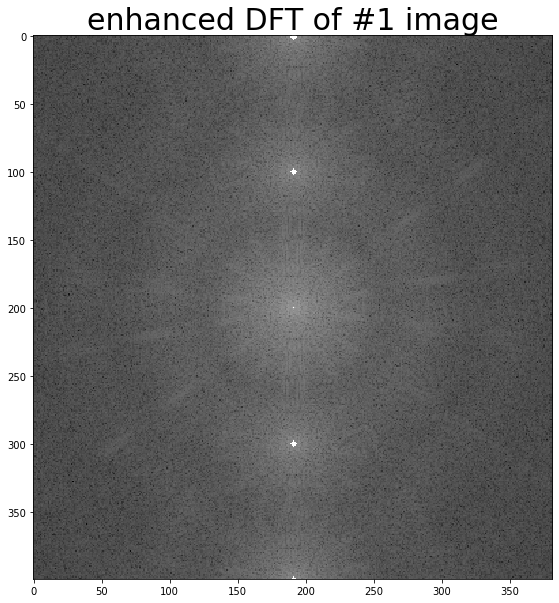

In [14]:
filtered = bs1*bs2*bs3*bs4*dfts[1]
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #1 image',fontsize=30)
plt.show()

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


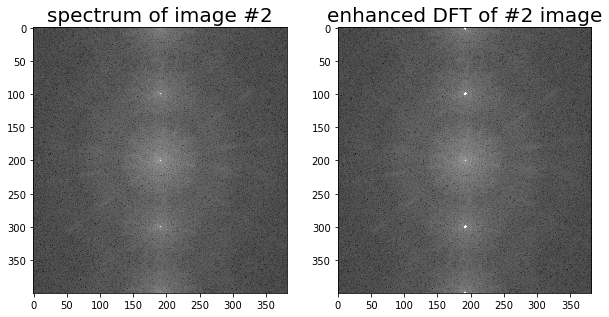

In [15]:
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(dfts[1])),'gray')
plt.title('spectrum of image #2',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #2 image',fontsize=20)
plt.show()

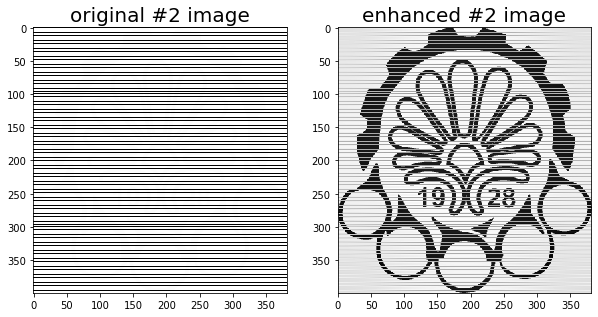

In [16]:
new = np.fft.ifftshift(filtered)
new = np.fft.ifft2(new)
#new_contrast = new ** 8

plt.subplot(1,2,1)
plt.imshow(images[1],'gray')
plt.title('original #2 image',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.real(new),'gray')
plt.title('enhanced #2 image',fontsize=20)
plt.show()

# image 3

In [17]:
bs_ver = np.ones(images[2].shape)
bs_hor = np.ones(images[2].shape)

hor_val = [691,637,581,525,470,413,304,248,193,138,82,27]
ver_val = [28,82,138,192,249,303,415,470,526,580,637,692]
for val in hor_val:
    bs_hor *= hor_line(5,dfts[2],val)
for val in ver_val:
    bs_ver *= ver_line(5,dfts[2],val)
    
bs = bs_ver*bs_hor

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


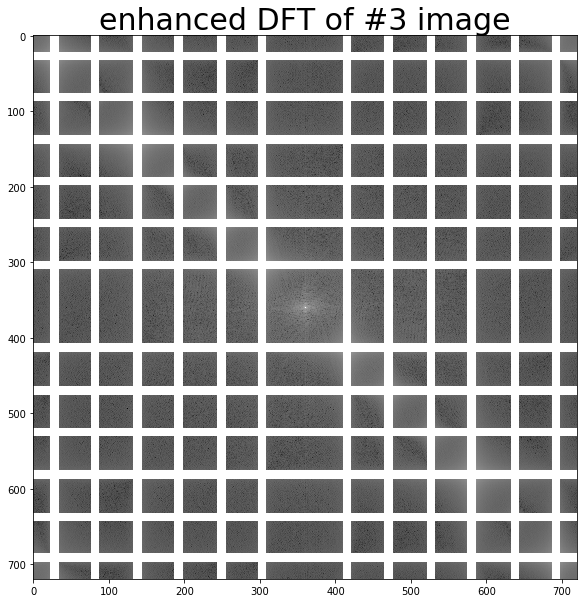

In [18]:
filtered = bs*dfts[2]
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #3 image',fontsize=30)
plt.show()

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


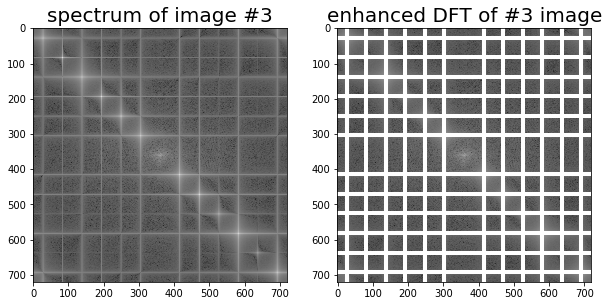

In [19]:
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(dfts[2])),'gray')
plt.title('spectrum of image #3',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(filtered)),'gray')
plt.title('enhanced DFT of #3 image',fontsize=20)
plt.show()

In [20]:
def df(img):  # to make a histogram (count distribution frequency)
    values = [0]*256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i,j]]+=1
    return values


def cdf(hist):  # cumulative distribution frequency
    cdf = [0] * len(hist)   #len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i]= cdf[i-1]+hist[i]
    # Now we normalize the histogram
    cdf = [ele*255/cdf[-1] for ele in cdf]  
    return cdf

def equalize_image(image):
    img = image
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values
    import numpy as np
    image_equalized = np.interp(image, range(0,256), my_cdf)
    return image_equalized

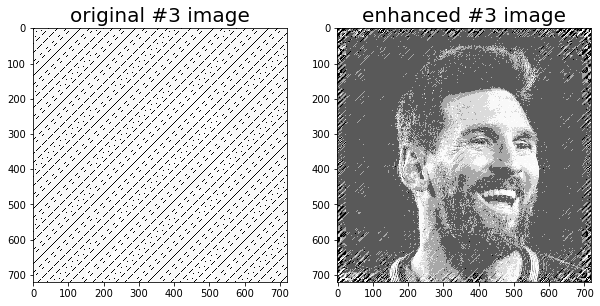

In [21]:
new = np.fft.ifftshift(filtered)
new = np.fft.ifft2(new)
#new_contrast = new ** 8
enhanced = np.real(new).astype(int)
equalized = equalize_image(enhanced)
plt.subplot(1,2,1)
plt.imshow(images[2],'gray')
plt.title('original #3 image',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(equalized**2.5,'gray')
plt.title('enhanced #3 image',fontsize=20)
plt.show()